In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations

In [2]:
df_precios = pd.read_csv('Datos/Transformados/dow_jones_clean.csv')

In [3]:
df_precios['Unnamed: 0'] = pd.to_datetime(df_precios['Unnamed: 0'] )
df_precios.set_index('Unnamed: 0', inplace=True)

<Axes: xlabel='Unnamed: 0'>

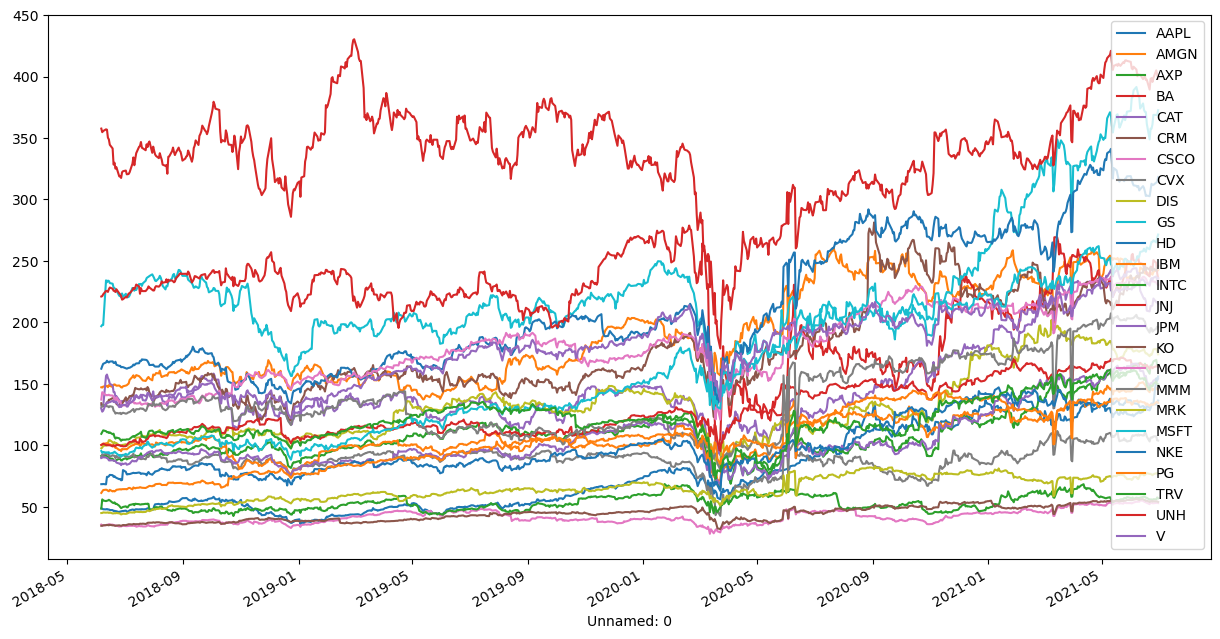

In [4]:
df_precios.plot(figsize=(15,8))

In [5]:
def calcular_metrics(df, freq_anual=252, rf=0.0):
    """
    Calcula rentabilidad, volatilidad, ratios de Sharpe, Sortino y drawdown máximo.
    
    Parámetros:
        df (DataFrame): precios ajustados, columnas=activos, index=fechas
        freq_anual (int): número de periodos al año para anualizar
        rf (float): rentabilidad libre de riesgo (diaria)
    
    Retorna:
        resumen (DataFrame): cada fila = un activo, columnas = métricas completas
    """
    resumen = pd.DataFrame(index=df.columns)
    
    # Rentabilidad diaria y log
    rent_simple = df.pct_change().dropna()
    rent_log = np.log(df / df.shift(1)).dropna()
    
    #Rentabilidad media diaria y anual
    resumen["Rentabilidad media diaria"] = rent_simple.mean()
    resumen["Rentabilidad media anual"] = rent_simple.mean() * freq_anual
    
    #Volatilidad diaria y anual
    resumen["Volatilidad diaria"] = rent_simple.std()
    resumen["Volatilidad anual"] = rent_simple.std() * np.sqrt(freq_anual)
    
    #Sharpe ratio anualizado (suponiendo rf diario = 0)
    resumen["Sharpe ratio"] = (resumen["Rentabilidad media anual"] - rf*freq_anual) / resumen["Volatilidad anual"]
    
    #Sortino ratio anualizado
    downside_std = rent_simple[rent_simple < 0].std()  # desviación solo de rendimientos negativos
    resumen["Sortino ratio"] = (resumen["Rentabilidad media anual"] - rf*freq_anual) / (downside_std * np.sqrt(freq_anual))
    
    #Drawdown máximo
    max_dd = {}
    for col in df.columns:
        precio_cum_max = df[col].cummax()
        dd = (df[col] / precio_cum_max) - 1
        max_dd[col] = dd.min()
    resumen["Drawdown máximo"] = pd.Series(max_dd)
    
    return resumen

In [6]:
df_metrics = calcular_metrics(df_precios)
df_metrics

,Rentabilidad media diaria,Rentabilidad media anual,Volatilidad diaria,Volatilidad anual,Sharpe ratio,Sortino ratio,Drawdown máximo
AAPL,0.001528,0.385123,0.021389,0.339543,1.134237,1.486121,-0.383931
AMGN,0.000883,0.222636,0.022750,0.361145,0.616474,0.826110,-0.245339
AXP,0.001064,0.268053,0.025743,0.408662,0.655927,0.873016,-0.496385
BA,0.000113,0.028505,0.035493,0.563433,0.050592,0.065410,-0.779201
CAT,0.000875,0.220579,0.023222,0.368640,0.598359,0.831417,-0.419463
CRM,0.001045,0.263249,0.023986,0.380764,0.691370,0.954544,-0.357158
CSCO,0.000787,0.198335,0.023855,0.378690,0.523741,0.659275,-0.419511
CVX,0.000666,0.167865,0.031451,0.499264,0.336225,0.425440,-0.557739
DIS,0.000946,0.238310,0.020984,0.333115,0.715400,0.984047,-0.431062
GS,0.001096,0.276163,0.024380,0.387016,0.713572,0.978248,-0.459535


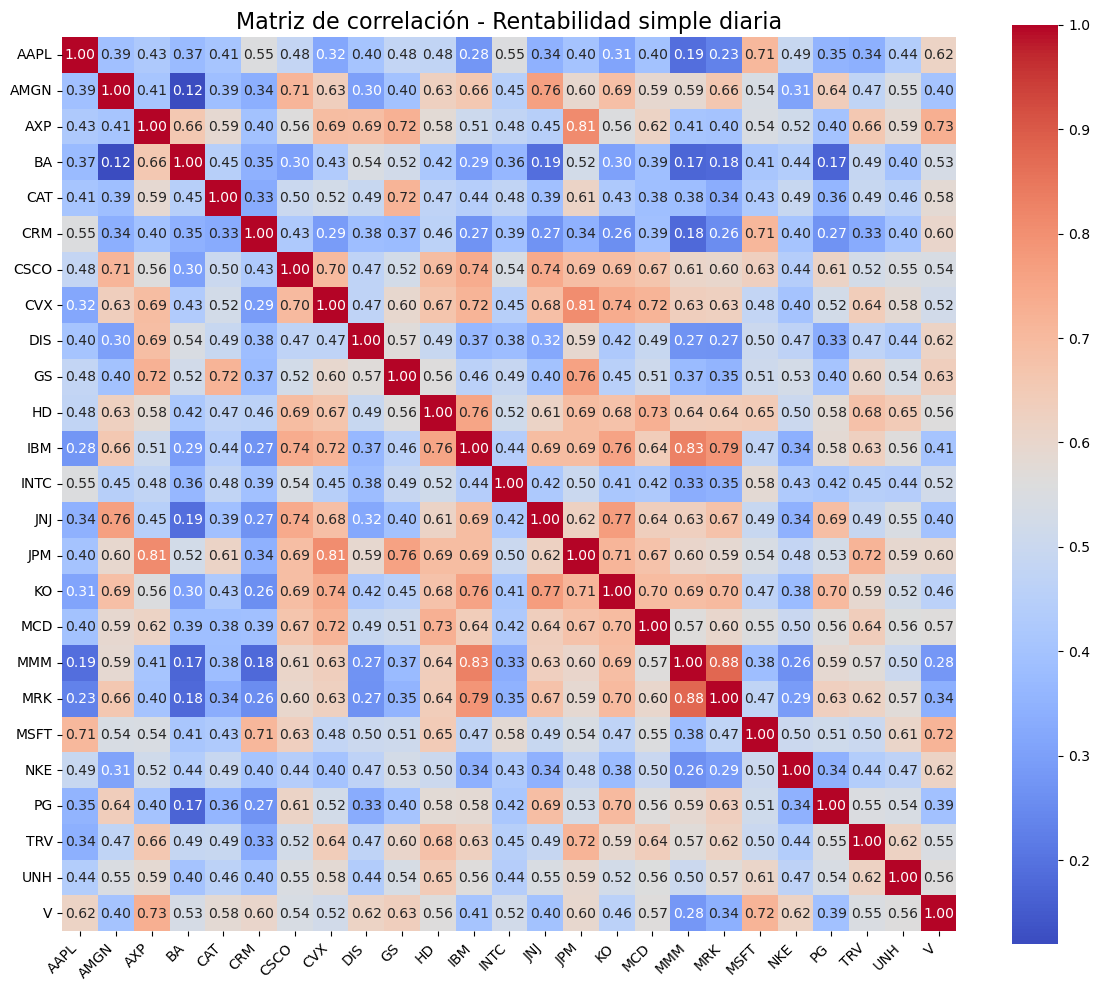

In [7]:
rent_simple = df_precios.pct_change()

corr_matrix = rent_simple.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de correlación - Rentabilidad simple diaria", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
def seleccionar_y_graficar_cartera(df_precios, resumen_metrics, top_sharpe_percent=0.5, ventana_vol=21):
    """
    Selecciona 3 activos siguiendo la estrategia y genera gráficos:
    - Riesgo vs rentabilidad
    - Evolución del precio
    - Evolución de rentabilidad diaria
    - Evolución de volatilidad móvil
    
    Parámetros:
        df_precios (DataFrame): precios ajustados
        resumen_metrics (DataFrame): métricas de los activos
        top_sharpe_percent (float): porcentaje top de activos por Sharpe ratio
        ventana_vol (int): ventana en días para volatilidad móvil
        
    Retorna:
        activos_seleccionados, metrics_cartera
    """
    # ====== Selección de activos ======
    n_top = int(len(resumen_metrics) * top_sharpe_percent)
    top_activos = resumen_metrics.sort_values(by="Sharpe ratio", ascending=False).head(n_top).index.tolist()
    
    rent_simple = df_precios[top_activos].pct_change().dropna()
    corr_matrix = rent_simple.corr()
    
    mejores_combinaciones = []
    for trio in combinations(top_activos, 3):
        corr_12 = corr_matrix.loc[trio[0], trio[1]]
        corr_13 = (corr_matrix.loc[trio[0], trio[2]] + corr_matrix.loc[trio[1], trio[2]]) / 2
        mejores_combinaciones.append({
            "trio": trio,
            "corr_12": corr_12,
            "corr_13": corr_13,
            "score": -corr_12 + abs(0.5 - corr_13)
        })
    
    mejores_combinaciones = sorted(mejores_combinaciones, key=lambda x: x["score"], reverse=True)
    activos_seleccionados = mejores_combinaciones[0]["trio"]
    
    # ====== Métricas de la cartera ponderada igual ======
    pesos = np.array([1/3, 1/3, 1/3])
    rent_cartera = rent_simple[list(activos_seleccionados)].dot(pesos)
    rent_media_anual = rent_cartera.mean() * 252
    vol_anual = rent_cartera.std() * np.sqrt(252)
    sharpe_cartera = rent_media_anual / vol_anual
    metrics_cartera = pd.DataFrame({
        "Rentabilidad media anual": [rent_media_anual],
        "Volatilidad anual": [vol_anual],
        "Sharpe ratio": [sharpe_cartera]
    }, index=["Cartera"])
    
    # ====== Gráfico 1: Riesgo vs rentabilidad ======
    plt.figure(figsize=(12,8))
    plt.scatter(resumen_metrics["Volatilidad anual"], resumen_metrics["Rentabilidad media anual"], 
                c=resumen_metrics["Sharpe ratio"], cmap="viridis", s=100, alpha=0.7, label="Activos")
    
    for activo in activos_seleccionados:
        plt.scatter(resumen_metrics.loc[activo, "Volatilidad anual"], 
                    resumen_metrics.loc[activo, "Rentabilidad media anual"], 
                    color="red", s=150, edgecolors="black", label=f"Seleccionado: {activo}")
    
    plt.scatter(metrics_cartera["Volatilidad anual"], metrics_cartera["Rentabilidad media anual"], 
                color="black", s=200, marker="*", label="Cartera (ponderada)")
    plt.xlabel("Volatilidad anual")
    plt.ylabel("Rentabilidad anual")
    plt.title("Riesgo vs Rentabilidad - Activos y Cartera", fontsize=16)
    plt.colorbar(label="Sharpe ratio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ====== Gráfico 2: Evolución del precio ======
    df_precios[list(activos_seleccionados)].plot(figsize=(12,6), title="Evolución del precio de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Precio ajustado")
    plt.grid(True)
    plt.show()
    
    # ====== Gráfico 3: Evolución de la rentabilidad diaria ======
    rent_diaria = df_precios[list(activos_seleccionados)].pct_change().dropna()
    rent_diaria.plot(figsize=(12,6), title="Rentabilidad diaria de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Rentabilidad diaria")
    plt.grid(True)
    plt.show()
    
    # ====== Gráfico 4: Volatilidad móvil ======
    vol_movil = rent_diaria.rolling(ventana_vol).std()
    vol_movil.plot(figsize=(12,6), title=f"Volatilidad móvil ({ventana_vol} días) de los activos seleccionados")
    plt.xlabel("Fecha")
    plt.ylabel("Volatilidad")
    plt.grid(True)
    plt.show()
    
    return activos_seleccionados, metrics_cartera

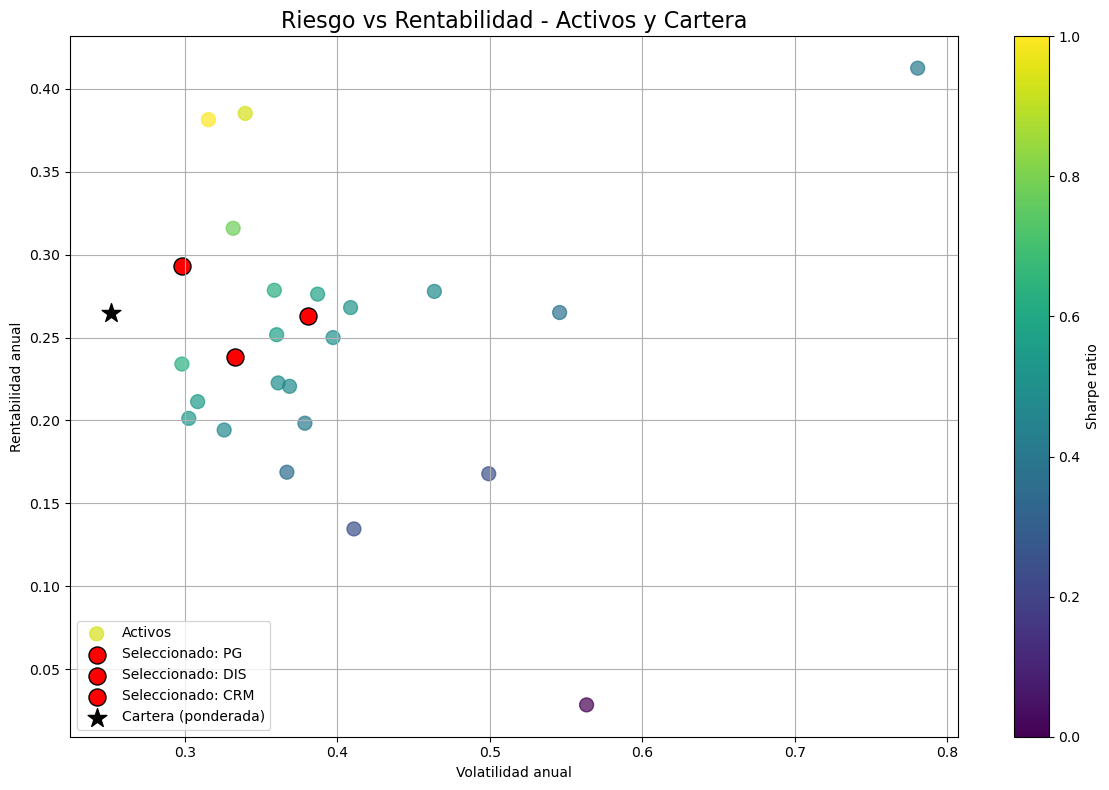

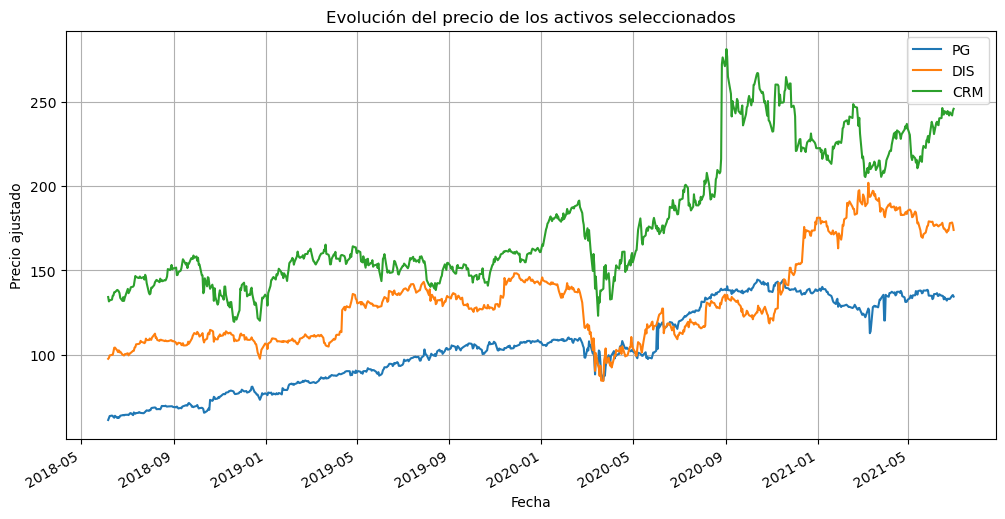

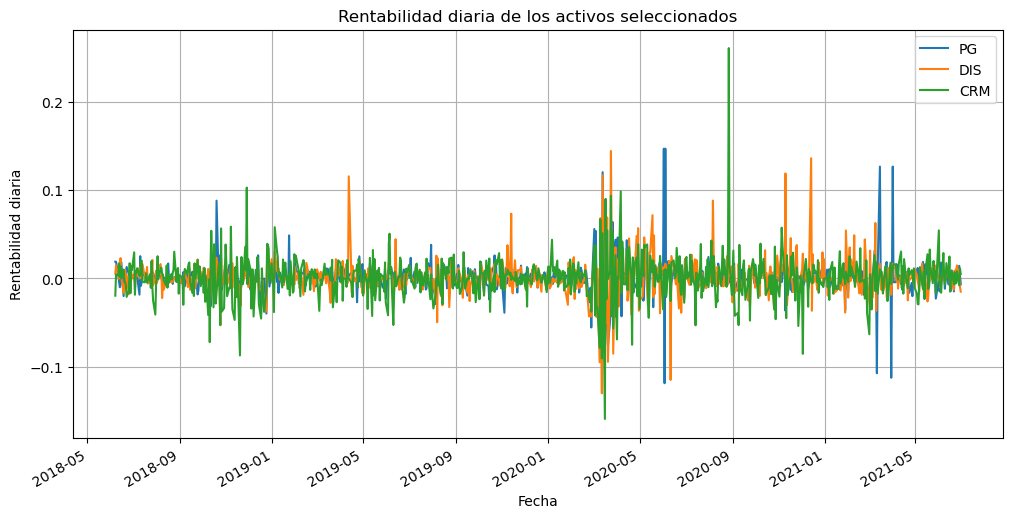

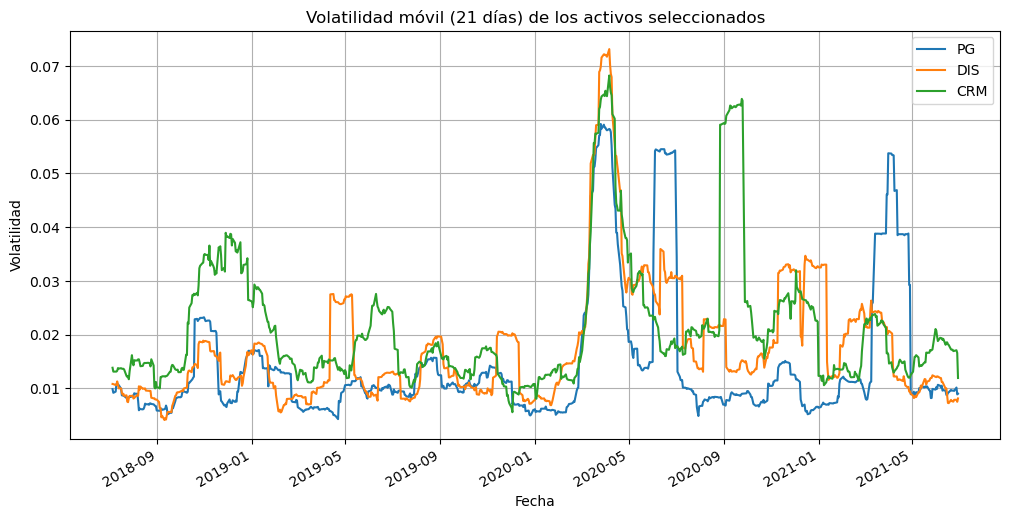

(('PG', 'DIS', 'CRM'),
          Rentabilidad media anual  Volatilidad anual  Sharpe ratio
 Cartera                  0.264857           0.251275      1.054053)

In [9]:
seleccionar_y_graficar_cartera(df_precios, df_metrics)